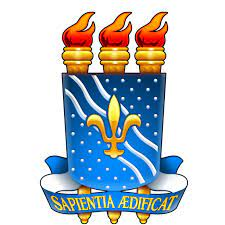
## UNIVERSIDADE FEDERAL DA PARAÍBA
### CENTRO DE TECNOLOGIA
### Programa de Pós-Graduação em Engenharia Civil e Ambiental (PPGECAM)
#### Disciplina: Linguagem de Programação (SECEA0052)
#### Semestre: 2022.1
#### Docente: Prof. Dr. Cristiano Das Neves Almeida

### Grupo 9:     
####                João Luiz Franca Ribeiro (20221012341)
####                André Gustavo De Medeiros Simoes (20221010481)
####                Raul Souza Muniz (20221012261)
####                Ítalo Johnes de Carvalho (20221011980)

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd

### Parte 01 - Leitura e pré-processamento dos dados

In [3]:
# Leitura dos arquivos

Lista_tabelas = ['est. pluv. 14 (Fev.06.2019).csv', 'est. pluv. 14 (Jul.17.2019).csv', 'est. pluv. 14 (Out.04.2019).csv', 'est. pluv.14 (Mar.04.2020).csv']
lista_concat = []
for tabela in Lista_tabelas:     # Pegando o nome de cada tabela e fazendo a leitura dos dados
    df_prov = pd.read_csv(tabela, skiprows=5, header=None)
    lista_concat.append(df_prov)    # Inserindo os dados na lista criada anteriormente
    
# Transformando a lista em df único
df = pd.concat(lista_concat, axis=0, ignore_index=True)

# Renomeando as colunas do df
df.rename(columns={0:'id', 1: 'date_str', 2: 'rain_str'}, inplace=True)
df

,id,date_str,rain_str
0,1,2018-11-08 09:15:00,0.0 per Logging Interval
1,2,2018-11-08 09:20:00,0.0 per Logging Interval
2,3,2018-11-08 09:25:00,0.0 per Logging Interval
3,4,2018-11-08 09:30:00,0.0 per Logging Interval
4,5,2018-11-08 09:35:00,0.0 per Logging Interval
...,...,...,...
160350,65246,2020-03-04 15:45:00,0.0 per Logging Interval
160351,65247,2020-03-04 15:50:00,0.0 per Logging Interval
160352,65248,2020-03-04 15:55:00,0.0 per Logging Interval
160353,65249,2020-03-04 16:00:00,0.0 per Logging Interval


In [4]:
# Transformando as datas no formato strinf no formato datetime e alterando o nome da coluna

df['date_str'] = pd.to_datetime(df['date_str'])
df.rename(columns={'date_str':'date_time'}, inplace=True)

In [5]:
df.head(230)

,id,date_time,rain_str
0,1,2018-11-08 09:15:00,0.0 per Logging Interval
1,2,2018-11-08 09:20:00,0.0 per Logging Interval
2,3,2018-11-08 09:25:00,0.0 per Logging Interval
3,4,2018-11-08 09:30:00,0.0 per Logging Interval
4,5,2018-11-08 09:35:00,0.0 per Logging Interval
...,...,...,...
225,226,2018-11-09 04:00:00,0.0 per Logging Interval
226,227,2018-11-09 04:05:00,0.0 per Logging Interval
227,228,2018-11-09 04:10:00,1.0 per Logging Interval
228,229,2018-11-09 04:15:00,1.0 per Logging Interval


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105120 entries, 2019-01-01 00:00:00 to 2019-12-31 23:55:00
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   rain_mm  105120 non-null  float64
 1   accum    105120 non-null  float64
dtypes: float64(2)
memory usage: 2.4 MB


In [7]:
# Dividindo a cooluna rain_str (string) no primeiro espaço (n=1) e atribuindo os resultados às colunas rain_mm e lixo
# A coluna lixo recebe a parte não importando da colna rain_str e será excluída depois

df[['rain_mm','lixo']] = df['rain_str'].str.split(' ', expand=True, n=1)

# Exclusão de colunas não importantes
df.drop(columns=['rain_str','lixo','id'], inplace=True)

# Alterando o tipo dos dados inseridos na coluna rain_mm de string para float
df['rain_mm'] = df['rain_mm'].astype(float)
df

,date_time,rain_mm
0,2018-11-08 09:15:00,0.0
1,2018-11-08 09:20:00,0.0
2,2018-11-08 09:25:00,0.0
3,2018-11-08 09:30:00,0.0
4,2018-11-08 09:35:00,0.0
...,...,...
160350,2020-03-04 15:45:00,0.0
160351,2020-03-04 15:50:00,0.0
160352,2020-03-04 15:55:00,0.0
160353,2020-03-04 16:00:00,0.0


In [8]:
# Removendo os dados duplicados

df.drop_duplicates(inplace=True)

In [9]:
# Transfromando os pulsos em pricipitação em milímetros através da aplicação do lambda

df[:]['rain_mm'] = df['rain_mm'].apply(lambda x: x*0.204)

In [10]:
df.head(230)

,date_time,rain_mm
0,2018-11-08 09:15:00,0.000
1,2018-11-08 09:20:00,0.000
2,2018-11-08 09:25:00,0.000
3,2018-11-08 09:30:00,0.000
4,2018-11-08 09:35:00,0.000
...,...,...
225,2018-11-09 04:00:00,0.000
226,2018-11-09 04:05:00,0.000
227,2018-11-09 04:10:00,0.204
228,2018-11-09 04:15:00,0.204


In [11]:
# Filtrando apenas os anos de 2019

filt = (df['date_time'].dt.year == 2019)
df = df.loc[filt]
df


,date_time,rain_mm
15441,2019-01-01 00:00:00,0.0
15442,2019-01-01 00:05:00,0.0
15443,2019-01-01 00:10:00,0.0
15444,2019-01-01 00:15:00,0.0
15445,2019-01-01 00:20:00,0.0
...,...,...
142012,2019-12-31 23:35:00,0.0
142013,2019-12-31 23:40:00,0.0
142014,2019-12-31 23:45:00,0.0
142015,2019-12-31 23:50:00,0.0


In [12]:
# Setando a coluna date_time como index do df

df = pd.DataFrame(df.set_index('date_time'))
df

,rain_mm
date_time,
2019-01-01 00:00:00,0.0
2019-01-01 00:05:00,0.0
2019-01-01 00:10:00,0.0
2019-01-01 00:15:00,0.0
2019-01-01 00:20:00,0.0
...,...
2019-12-31 23:35:00,0.0
2019-12-31 23:40:00,0.0
2019-12-31 23:45:00,0.0


In [55]:
# Verificando se a ordem original do date_time está correta

df_teste = df
df_teste.sort_index()

lista_teste = df_teste.index == df.index
print(False in lista_teste)

# Como o retorno do print foi False, o index do df sem aplicação do método sort é igual ao index com aplicação do método sort,
# indicando que o df original já está na ordem correta.

False


In [53]:
for elemento in lista_teste:
    if elemento == False:
        print('df original com ordem errada!!!')

### Parte 02 - Visualização de dados

#### a. Passo tempo de 5 min

In [14]:
# Obtendo a estatística descritiva básica dos dados de chuva com o método describe()

estat_descritiva_5min = pd.DataFrame(df['rain_mm'].describe())
estat_descritiva_5min

,rain_mm
count,105120.000000
mean,0.011174
std,0.118635
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.548000


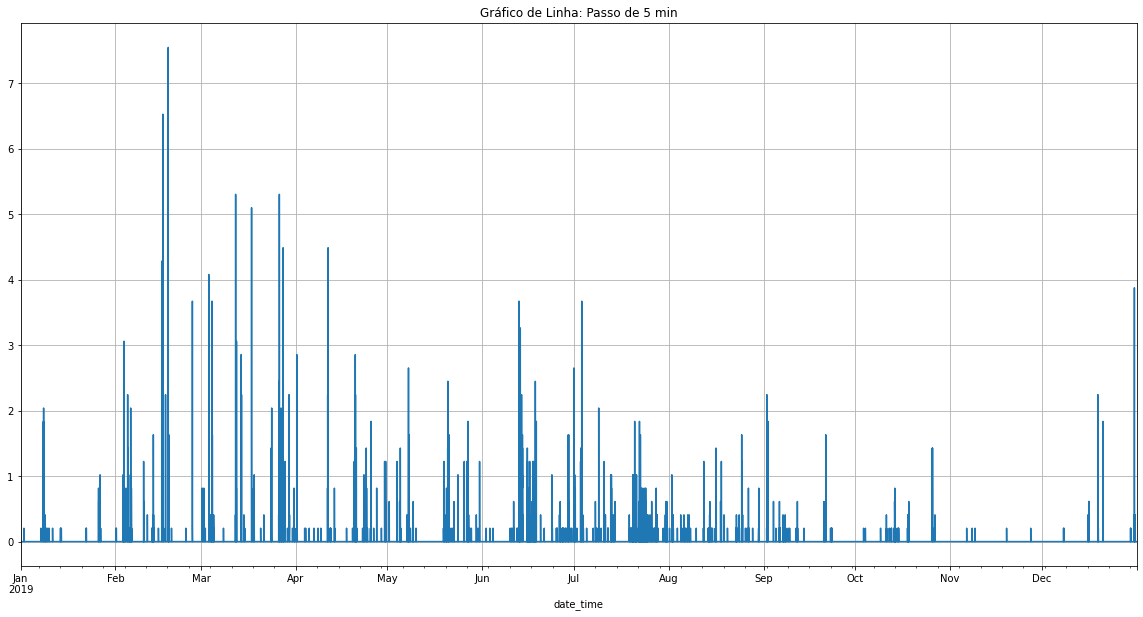

In [60]:
ax = df['rain_mm'].plot.line(title='Gráfico de Linha: Passo de 5 min', figsize=(20,10)).grid()

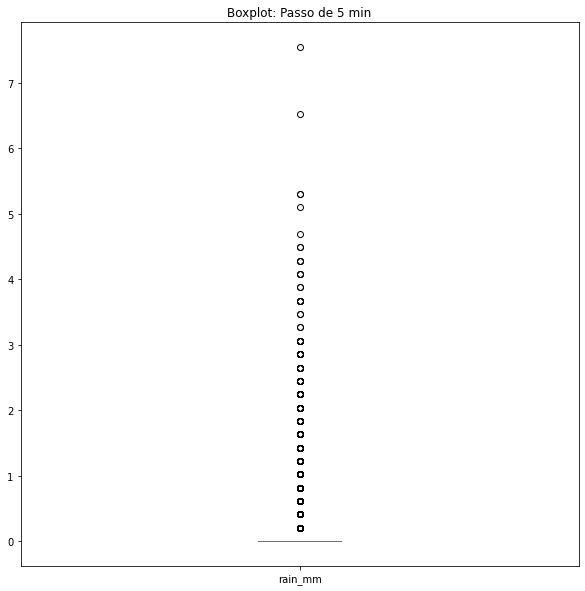

In [58]:
df['rain_mm'].plot.box(title='Boxplot: Passo de 5 min', figsize=(10,10));

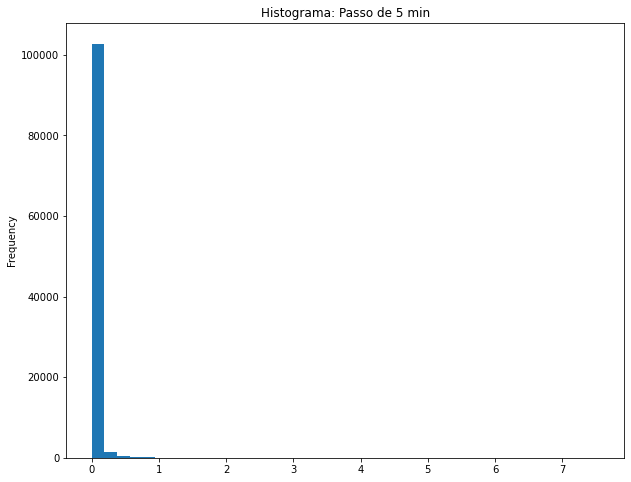

In [59]:
df['rain_mm'].plot.hist(title='Histograma: Passo de 5 min', figsize=(10,8), bins=40);

#### Obs.: criando as precipitações horárias, diárias e mensais

In [18]:
# Obtendo os dados de chuva horarios, diarios e mensais com os métodos resample() e sum()

df_horario = df.resample('H').sum()
df_diario = df.resample('D').sum()
df_mensal = df.resample('M').sum()

#### b. Dados horários

In [19]:
estat_descritiva_H = pd.DataFrame(df_horario['rain_mm'].describe())
estat_descritiva_H

,rain_mm
count,8760.000000
mean,0.134090
std,0.919467
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,26.316000


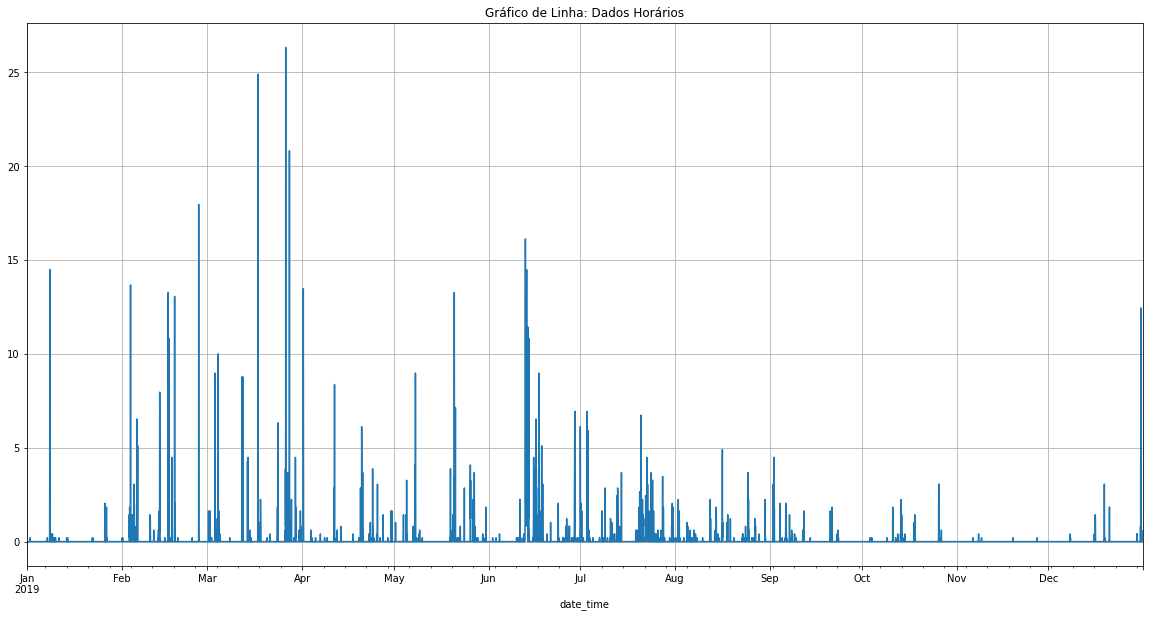

In [61]:
df_horario['rain_mm'].plot.line(title='Gráfico de Linha: Dados Horários', figsize=(20,10)).grid()

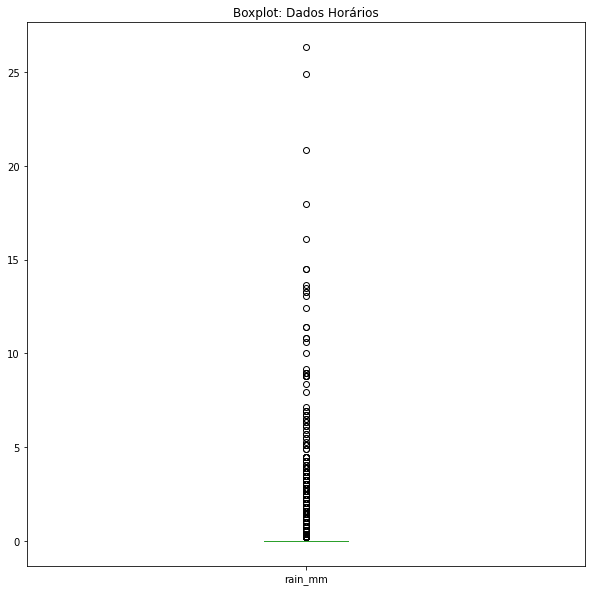

In [62]:
df_horario['rain_mm'].plot.box(title='Boxplot: Dados Horários', figsize=(10,10));

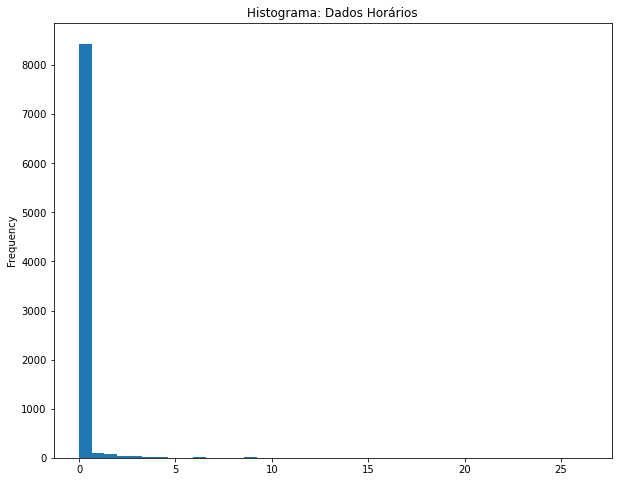

In [63]:
df_horario['rain_mm'].plot.hist(title='Histograma: Dados Horários', figsize=(10,8), bins=40);

#### c. Dados diários

In [23]:
estat_descritiva_D = pd.DataFrame(df_diario['rain_mm'].describe())
estat_descritiva_D

,rain_mm
count,365.000000
mean,3.218170
std,9.594613
min,0.000000
25%,0.000000
50%,0.204000
75%,2.244000
max,141.168000


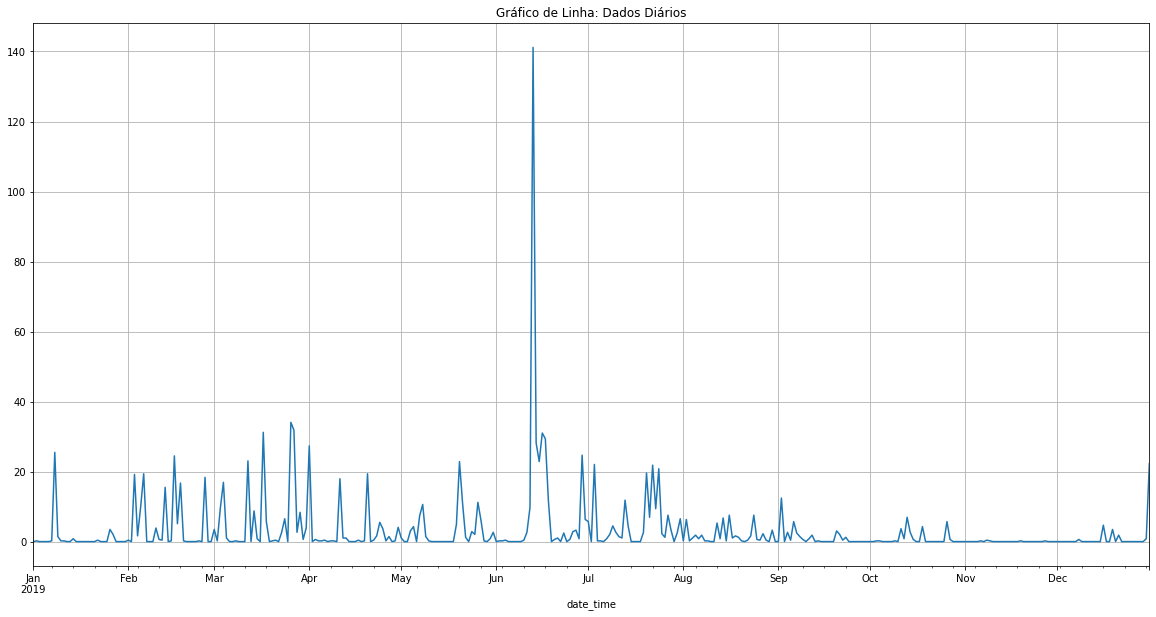

In [64]:
df_diario['rain_mm'].plot.line(title='Gráfico de Linha: Dados Diários', figsize=(20,10)).grid()

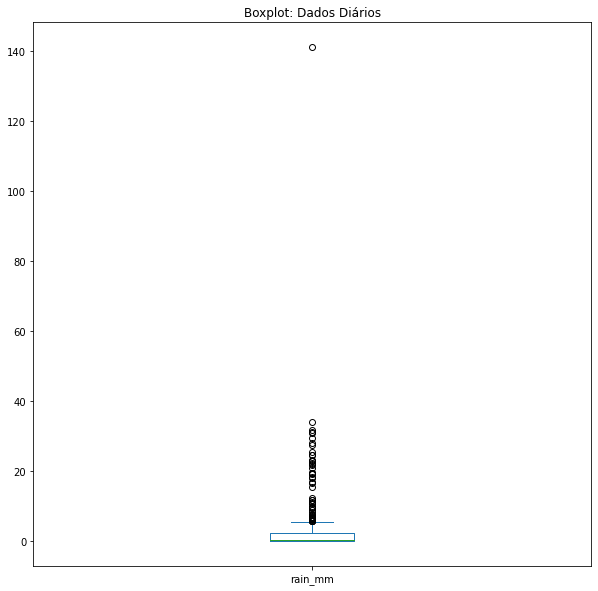

In [65]:
df_diario['rain_mm'].plot.box(title='Boxplot: Dados Diários', figsize=(10,10));

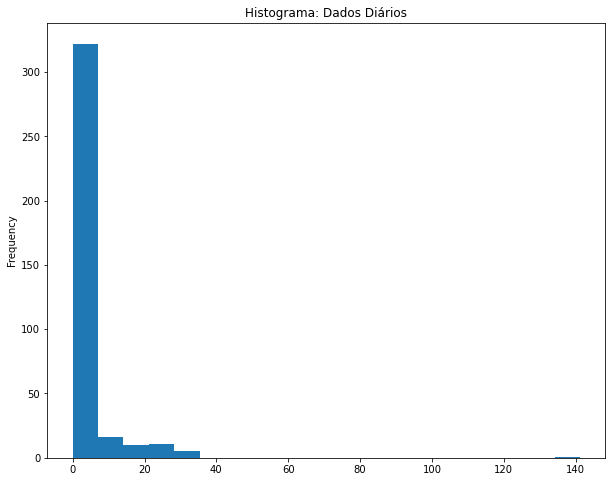

In [66]:
df_diario['rain_mm'].plot.hist(title='Histograma: Dados Diários', figsize=(10,8), bins=20);

#### d. Dados mensais

In [27]:
estat_descritiva_H = pd.DataFrame(df_mensal['rain_mm'].describe())
estat_descritiva_H

,rain_mm
count,12.000000
mean,97.886000
std,91.752587
min,1.224000
25%,34.272000
50%,70.074000
75%,142.392000
max,320.484000


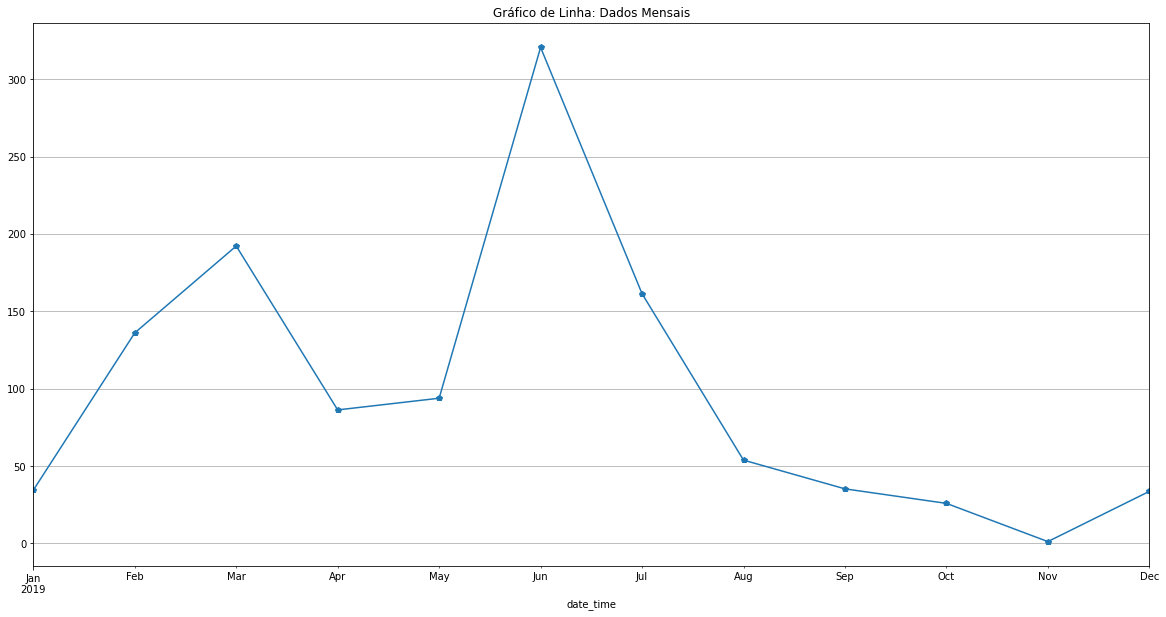

In [69]:
df_mensal['rain_mm'].plot.line(title='Gráfico de Linha: Dados Mensais', figsize=(20,10), marker='p').grid()

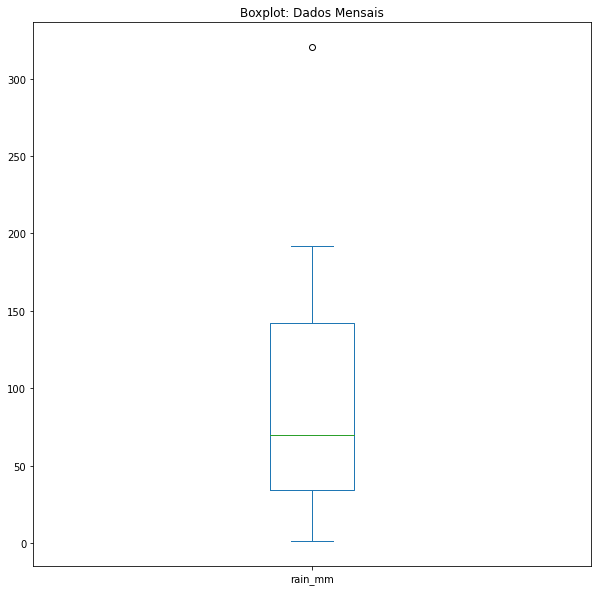

In [71]:
df_mensal['rain_mm'].plot.box(title='Boxplot: Dados Mensais', figsize=(10,10));

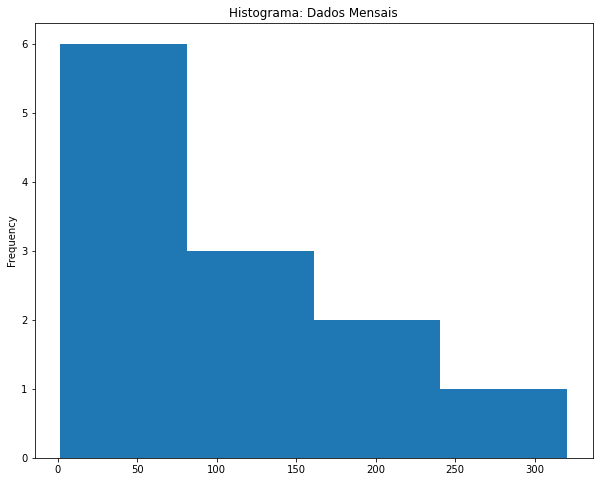

In [70]:
df_mensal['rain_mm'].plot.hist(title='Histograma: Dados Mensais', figsize=(10,8), bins=4);

#### e. Análise das chuvas acumuladas

#### e.1.  Análise das chuvas acumuladas para passo de 5 min

In [31]:
# Obtendo os valores acumulados de chuva com o método cumsum(). O mesmo será realizado com os dados horários, diários e mensais.

df['accum'] = df['rain_mm'].cumsum()
df

,rain_mm,accum
date_time,,
2019-01-01 00:00:00,0.0,0.000
2019-01-01 00:05:00,0.0,0.000
2019-01-01 00:10:00,0.0,0.000
2019-01-01 00:15:00,0.0,0.000
2019-01-01 00:20:00,0.0,0.000
...,...,...
2019-12-31 23:35:00,0.0,1174.632
2019-12-31 23:40:00,0.0,1174.632
2019-12-31 23:45:00,0.0,1174.632


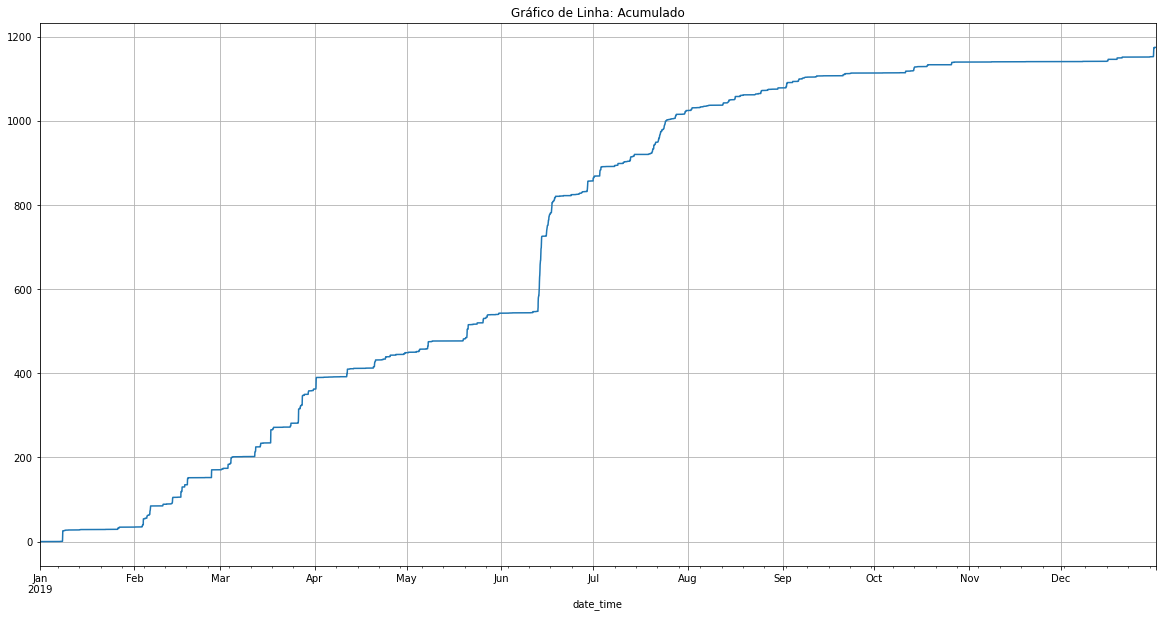

In [72]:
df['accum'].plot.line(title='Gráfico de Linha: Acumulado', figsize=(20,10)).grid()

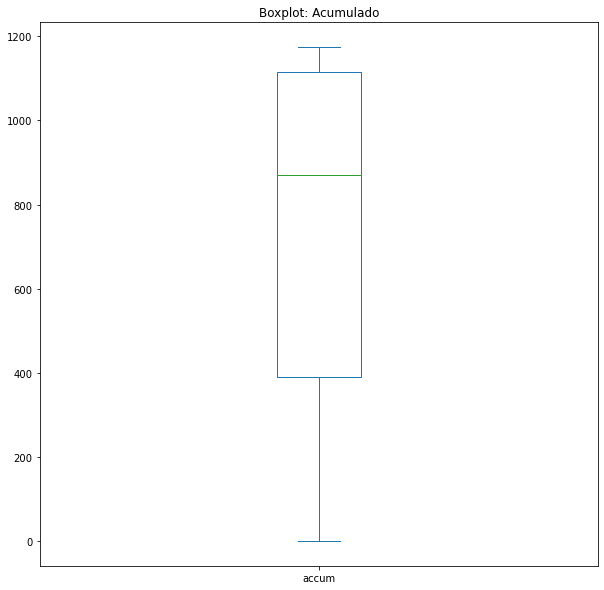

In [73]:
df['accum'].plot.box(title='Boxplot: Acumulado', figsize=(10,10));

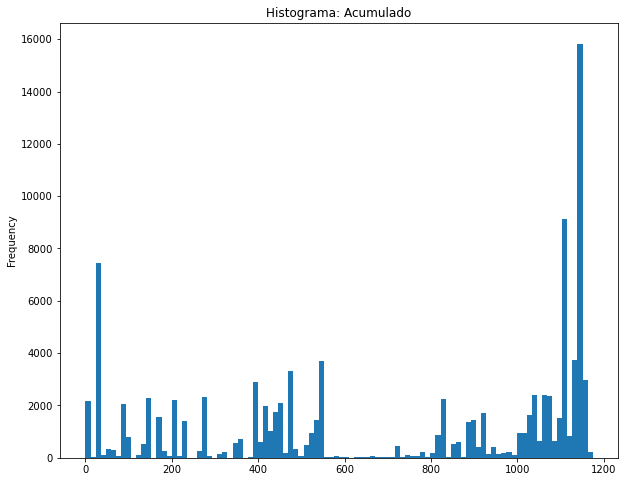

In [74]:
df['accum'].plot.hist(title='Histograma: Acumulado', figsize=(10,8), bins=100);

#### e.2.  Análise das chuvas acumuladas para dados horários

In [35]:
df_horario['accum'] = df_horario['rain_mm'].cumsum()
df_horario

,rain_mm,accum
date_time,,
2019-01-01 00:00:00,0.0,0.000
2019-01-01 01:00:00,0.0,0.000
2019-01-01 02:00:00,0.0,0.000
2019-01-01 03:00:00,0.0,0.000
2019-01-01 04:00:00,0.0,0.000
...,...,...
2019-12-31 19:00:00,0.0,1174.632
2019-12-31 20:00:00,0.0,1174.632
2019-12-31 21:00:00,0.0,1174.632


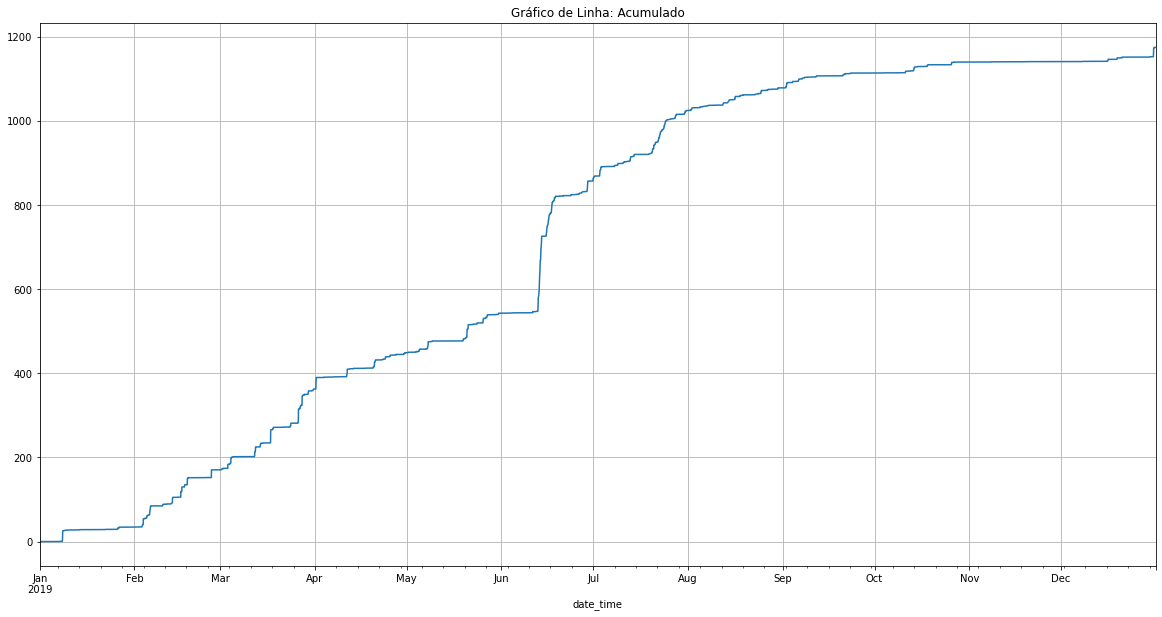

In [75]:
df_horario['accum'].plot.line(title='Gráfico de Linha: Acumulado', figsize=(20,10)).grid()

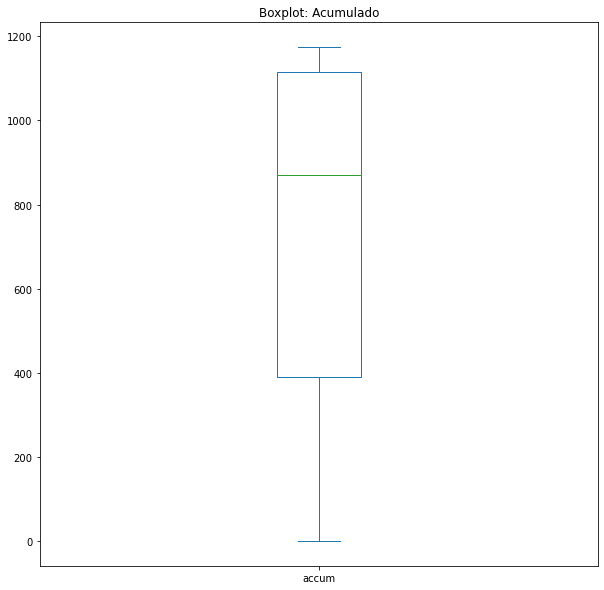

In [76]:
df_horario['accum'].plot.box(title='Boxplot: Acumulado', figsize=(10,10));

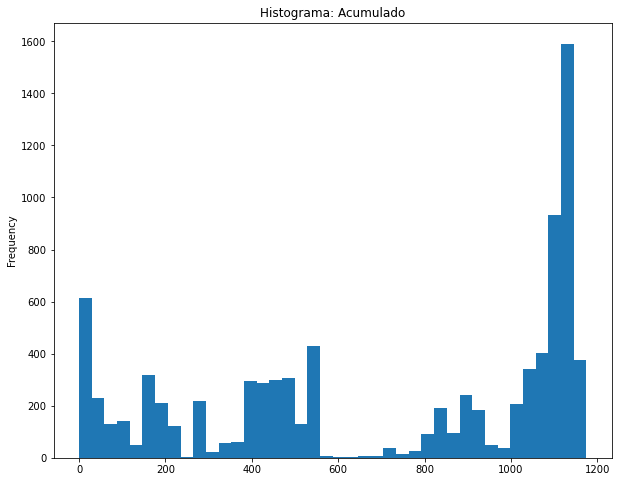

In [77]:
df_horario['accum'].plot.hist(title='Histograma: Acumulado', figsize=(10,8), bins=40);

#### e.3.  Análise das chuvas acumuladas para dados diários

In [39]:
df_diario['accum'] = df_diario['rain_mm'].cumsum()
df_diario

,rain_mm,accum
date_time,,
2019-01-01,0.000,0.000
2019-01-02,0.204,0.204
2019-01-03,0.000,0.204
2019-01-04,0.000,0.204
2019-01-05,0.000,0.204
...,...,...
2019-12-27,0.000,1151.580
2019-12-28,0.000,1151.580
2019-12-29,0.000,1151.580


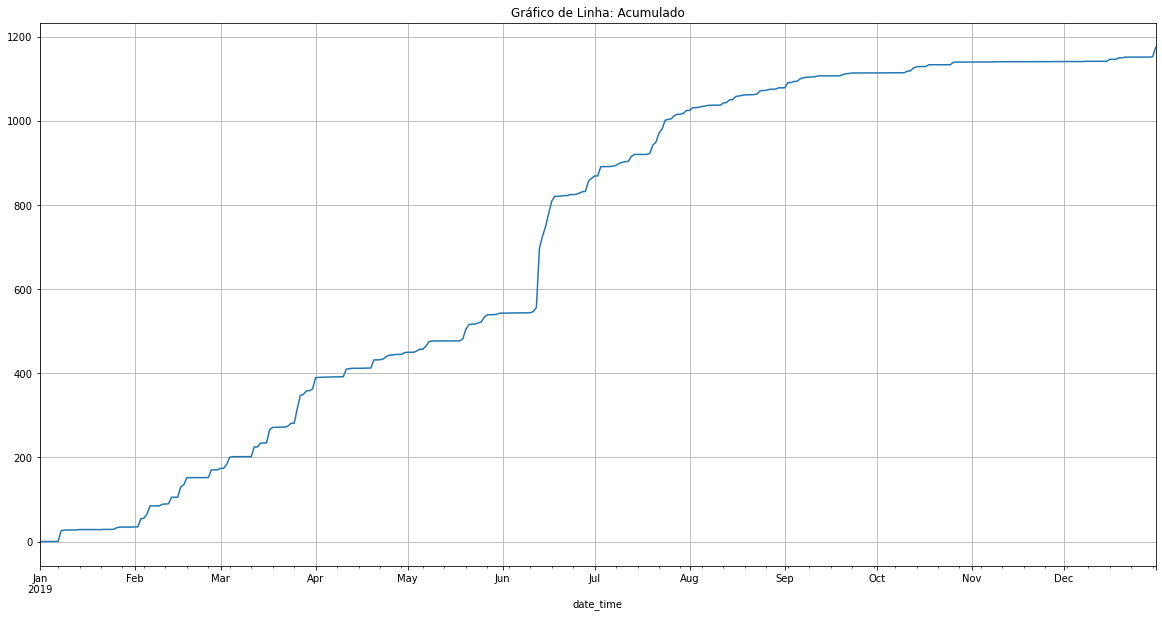

In [78]:
df_diario['accum'].plot.line(title='Gráfico de Linha: Acumulado', figsize=(20,10)).grid()

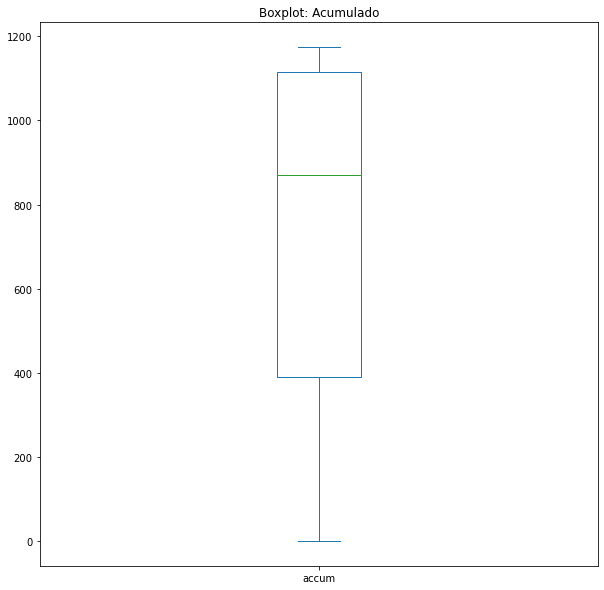

In [79]:
df_diario['accum'].plot.box(title='Boxplot: Acumulado', figsize=(10,10));

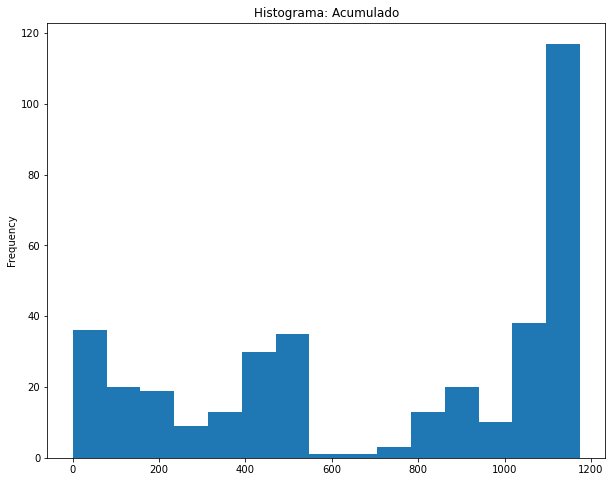

In [80]:
df_diario['accum'].plot.hist(title='Histograma: Acumulado', figsize=(10,8), bins=15);

#### e.4.  Análise das chuvas acumuladas para dados mensais

In [43]:
df_mensal['accum'] = df_mensal['rain_mm'].cumsum()
df_mensal

,rain_mm,accum
date_time,,
2019-01-31,34.476,34.476
2019-02-28,136.068,170.544
2019-03-31,192.168,362.712
2019-04-30,86.292,449.004
2019-05-31,93.840,542.844
2019-06-30,320.484,863.328
2019-07-31,161.364,1024.692
2019-08-31,53.856,1078.548
2019-09-30,35.292,1113.840


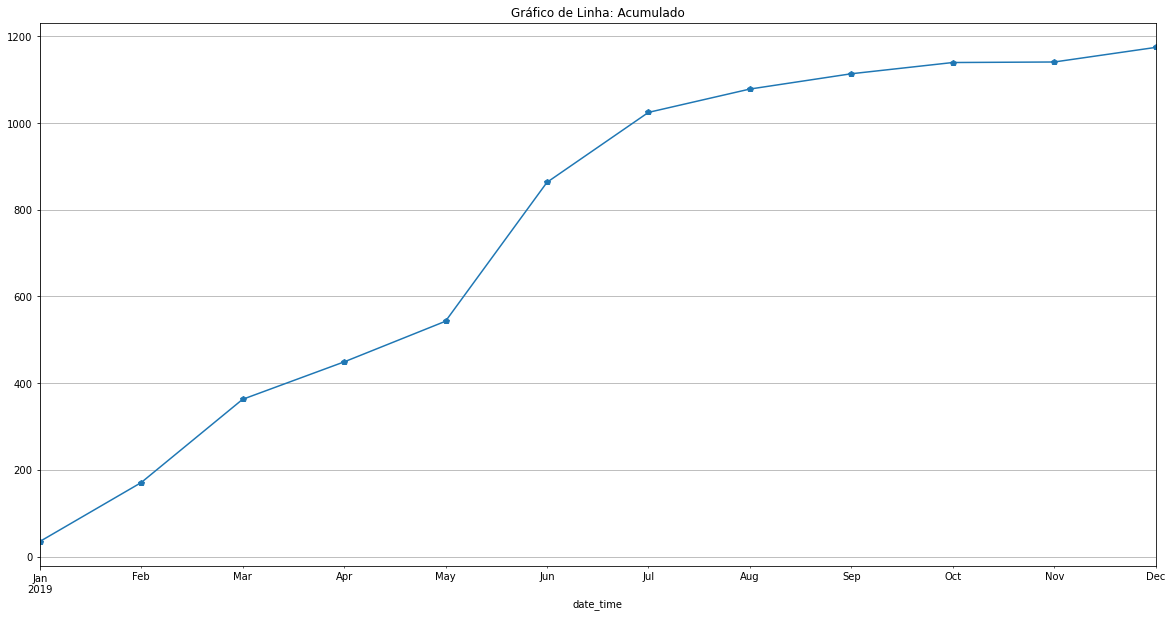

In [84]:
df_mensal['accum'].plot.line(title='Gráfico de Linha: Acumulado', figsize=(20,10), marker='p').grid()

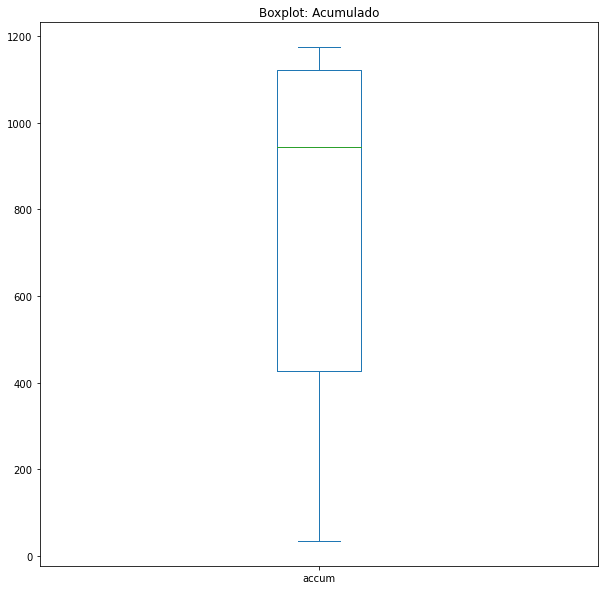

In [83]:
df_mensal['accum'].plot.box(title='Boxplot: Acumulado', figsize=(10,10));

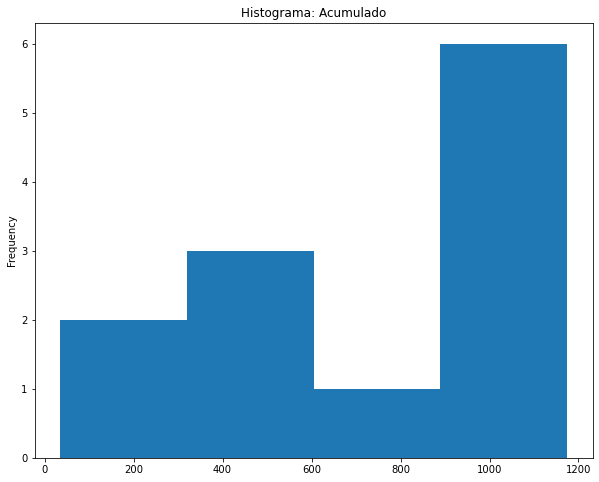

In [82]:
df_mensal['accum'].plot.hist(title='Histograma: Acumulado', figsize=(10,8), bins=4);